In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import mixedlm
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import TTestIndPower
import statsmodels.api as sm
!pip install pingouin
import pingouin as pg

# Load dataset
from google.colab import drive
drive.mount("/drive", force_remount=True)
df = pd.read_csv("/drive/MyDrive/INF2178_A4_data.csv")


Mounted at /drive


In [24]:
# Inspect the dataset
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Get summary statistics
summary_statistics = df.describe()
print(summary_statistics)

   Unnamed: 0 Subject ID         MRI ID        Group  Visit  MR Delay M/F  \
0           0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M   
1           1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M   
2           2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M   
3           3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M   
4           5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F   

  Hand  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF  
0    R   87    14  2.0  27.0  0.0  1987  0.696  0.883  
1    R   88    14  2.0  30.0  0.0  2004  0.681  0.876  
2    R   75    12  NaN  23.0  0.5  1678  0.736  1.046  
3    R   76    12  NaN  28.0  0.5  1738  0.713  1.010  
4    R   88    18  3.0  28.0  0.0  1215  0.710  1.444  
Unnamed: 0     0
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE          

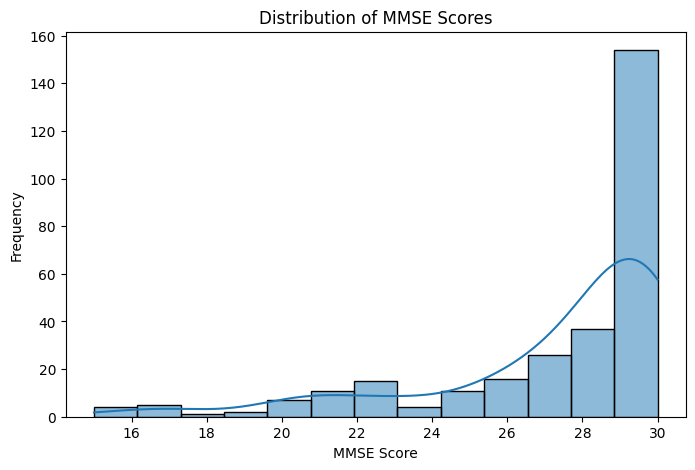

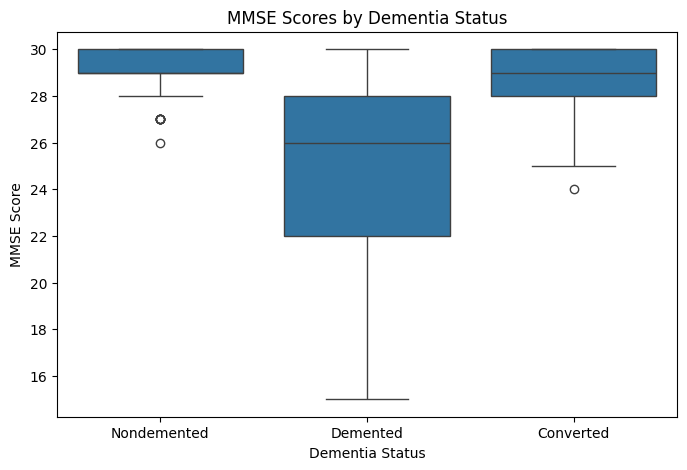

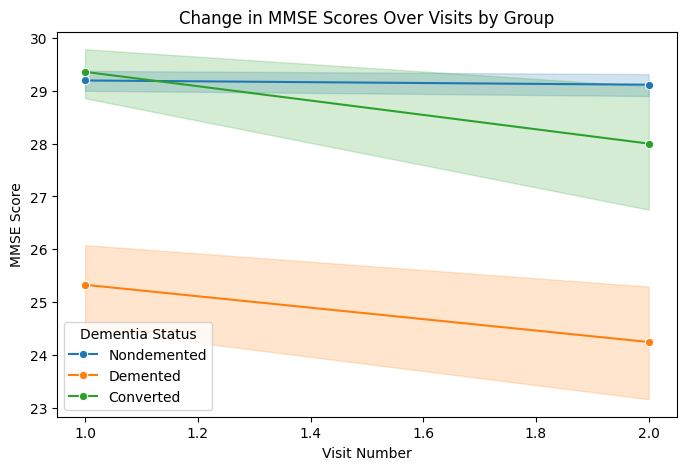

In [26]:
# MMSE score distribution across all individuals
plt.figure(figsize=(8, 5))
sns.histplot(df['MMSE'], kde=True)
plt.title('Distribution of MMSE Scores')
plt.xlabel('MMSE Score')
plt.ylabel('Frequency')
plt.show()

# Boxplot: MMSE score variations between dementia and non-dementia groups
plt.figure(figsize=(8, 5))
sns.boxplot(x='Group', y='MMSE', data=df)
plt.title('MMSE Scores by Dementia Status')
plt.xlabel('Dementia Status')
plt.ylabel('MMSE Score')
plt.show()

# Line plot: trend of MMSE score change over multiple visits for each group
plt.figure(figsize=(8, 5))
sns.lineplot(x='Visit', y='MMSE', hue='Group', data=df, marker='o')
plt.title('Change in MMSE Scores Over Visits by Group')
plt.xlabel('Visit Number')
plt.ylabel('MMSE Score')
plt.legend(title='Dementia Status')
plt.show()

In [27]:
# Mixed-effects ANOVA
mixed_anova_result = pg.mixed_anova(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
print(mixed_anova_result)


        Source           SS  DF1  DF2          MS          F         p-unc  \
0        Group  1328.421218    2  140  664.210609  56.212233  1.201604e-18   
1        Visit    22.377622    1  140   22.377622   8.859368  3.436529e-03   
2  Interaction    17.000403    2  140    8.500201   3.365255  3.737081e-02   

        np2  eps  
0  0.445379  NaN  
1  0.059515  1.0  
2  0.045870  NaN  


In [28]:
# Post-Hoc Tests
posthoc_tests = pg.pairwise_tests(dv='MMSE', within='Visit', between='Group', subject='Subject ID', data=df)
print(posthoc_tests)

# Test Assumptions for the Mixed Models

# Assumption 1: Shapiro-Wilk test for Normality for each group and condition
normality = pg.normality(data=df, dv='MMSE', group='Group')
print(normality)

# Assumption 2: Levene's testfor Homogeneity of variances for each level of the within-subjects factor
homogeneity = pg.homoscedasticity(data=df, dv='MMSE', group='Group')
print(homogeneity)

        Contrast Visit          A            B Paired Parametric         T  \
0          Visit     -          1            2   True       True  2.928096   
1          Group     -  Converted     Demented  False       True  6.738993   
2          Group     -  Converted  Nondemented  False       True -1.302773   
3          Group     -   Demented  Nondemented  False       True -9.448737   
4  Visit * Group     1  Converted     Demented  False       True  8.011725   
5  Visit * Group     1  Converted  Nondemented  False       True  0.488598   
6  Visit * Group     1   Demented  Nondemented  False       True -9.016012   
7  Visit * Group     2  Converted     Demented  False       True  4.547563   
8  Visit * Group     2  Converted  Nondemented  False       True -1.815516   
9  Visit * Group     2   Demented  Nondemented  False       True -8.463161   

          dof alternative         p-unc       BF10    hedges  
0  142.000000   two-sided  3.973770e-03       5.53  0.162378  
1   51.064827  

Appropriate sample size each group: 45.45


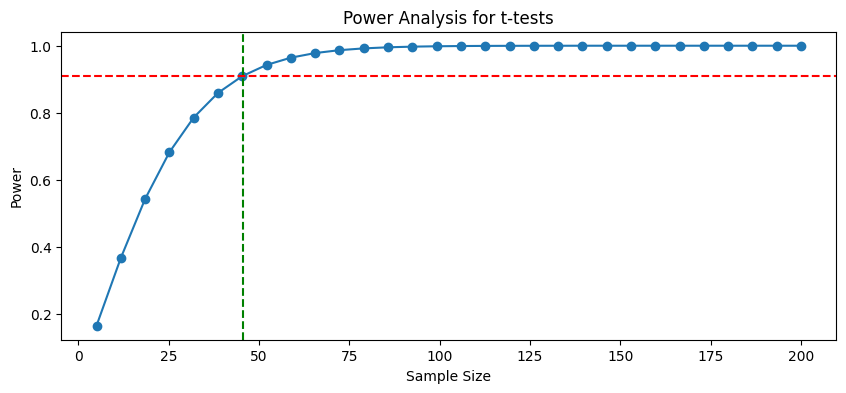

In [32]:
from statsmodels.stats.power import TTestIndPower
import numpy as np
import matplotlib.pyplot as plt


# Power Analysis
effect_size = 0.7  # Cohen's
alpha = 0.05  # Significance level
power = 0.91  # Desired Power
power_analysis = TTestIndPower()

# Calculate required sample size
sample_size = power_analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0, alternative='two-sided')
print(f'Appropriate sample size each group: {sample_size:.2f}')

# Plot the power analysis
sample_sizes = np.linspace(5, 200, 30)  # Set range of sample sizes
powers = power_analysis.solve_power(effect_size=effect_size, nobs1=sample_sizes, alpha=alpha, power=None, alternative='two-sided')

plt.figure(figsize=(10, 4))
plt.plot(sample_sizes, powers, 'o-')
plt.title('Power Analysis for t-tests')
plt.xlabel('Sample Size')
plt.ylabel('Power')
plt.axhline(y=power, color='red', linestyle='--')
plt.axvline(x=sample_size, color='green', linestyle='--')
plt.show()